# GEO WORK

In [2]:
from __future__ import print_function, division

#importing pandas for reading and parsing of tabulated data
import pandas as pd
#importing geopandas read to plot geographical information
import geopandas as gpd
#importing fiona to handle geographical coordinates
#import shapely to handle geographical shapes
import shapely

import pylab as pl
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [3]:
from pandas.io.gbq import read_gbq

In [4]:
import rtree

## Parks

In [5]:
cd ..

/Users/ingridspielman/Desktop/nytimes


In [6]:
parks = gpd.GeoDataFrame.from_file("smart_cities/NYC_shapefiles/Parks Properties.geojson")

In [7]:
parks.crs
park_proj = parks.to_crs({'init': u'epsg:2263'})
park_proj.crs

{'init': u'epsg:2263'}

In [8]:
park_proj.head()

,acres,address,borough,communityb,councildis,geometry,gispropnum,location,nys_assemb,nys_senate,signname,typecatego,us_congres,waterfront,zipcode
0,20.34,40-50 VERNON BOULEVARD,Q,"401, 402",26,"(POLYGON ((998639.728754477 214672.8443260061,...",Q104,"Queensboro Bridge, 41 Rd., 40 Ave. bet. The Ea...",37,12,Queensbridge Park,Community Park,12,Yes,11101
1,6.1,200 CITY ISLAND AV,X,210,13,(POLYGON ((1044445.201119723 246876.5331993471...,X253,City Island Ave bet. Centre St. and Winter St.,82,34,Ambrosini Field,Recreation Field/Courts,14,Yes,10464
2,0.159,11528 Ocean Promenade,Q,414,32,(POLYGON ((1029700.335596384 149921.5630676614...,Q494,"Beach 116 St., Ocean Promenade",23,15,Flight 587 Memorial Park,Triangle/Plaza,5,Yes,11694
3,0.44,1086 EAST 180 STREET,X,206,15,(POLYGON ((1018493.260897728 246060.4564194266...,X245,E 180 St bet. the Bronx River and Devoe Av,87,33,River Garden,Garden,15,Yes,10460
4,4.893,31-30 VERNON BOULEVARD,Q,401,26,"(POLYGON ((1001911.54078038 219553.4448010043,...",Q465,Vernon Blvd. bet. Broadway and 30 Dr.,37,12,Socrates Sculpture Park,Neighborhood Park,12,Yes,11106


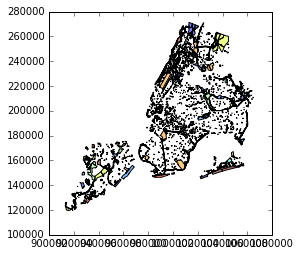

In [9]:
park_proj.plot()

## Zipcodes

In [10]:
zipcodes = gpd.GeoDataFrame.from_file("smart_cities/NYC_shapefiles/ZIP_CODE_040114/ZIP_CODE_040114.shp")

In [11]:
zipcodes_proj = zipcodes.to_crs({'init': u'epsg:2263'})

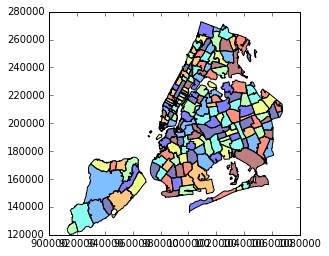

In [12]:
zipcodes.plot()

## CommunityB geodata

In [19]:
cd smart_cities/

/Users/ingridspielman/Desktop/nytimes/smart_cities


In [21]:
communities = gpd.GeoDataFrame.from_file("community_districts.geojson")

In [22]:
communities.head()

,BoroCD,Shape_Area,Shape_Leng,geometry
0,311,1.031759e+08,51566.991644,POLYGON ((-73.97299434004843 40.60881414180238...
1,404,6.563509e+07,36821.131610,POLYGON ((-73.84750820278066 40.73900780703917...
2,203,4.481448e+07,33489.439334,POLYGON ((-73.88072081514282 40.83752126451973...
3,308,4.560542e+07,38211.697490,"POLYGON ((-73.95829216807752 40.6798311339974,..."
4,106,3.870487e+07,40626.734083,(POLYGON ((-73.96421230395678 40.7466043184766...


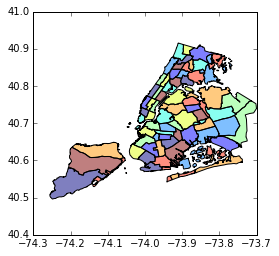

In [23]:
communities.plot()

In [24]:
communities_proj = communities.to_crs({'init': u'epsg:2263'})
communities_proj.crs

{'init': u'epsg:2263'}

## Neighborhoods

In [41]:
neighborhoods = gpd.GeoDataFrame.from_file("pediacitiesnycneighborhoods.geojson") 

In [59]:
neighborhoods_proj['area'] = neighborhoods_proj['geometry'].area

In [ ]:
# area is in m^2


In [60]:
neighborhoods_proj

,@id,borough,boroughCode,geometry,neighborhood,area
0,http://nyc.pediacities.com/Resource/Neighborho...,Bronx,2,"POLYGON ((1026123.025129274 256886.7940301135,...",Allerton,2.612211e+07
1,http://nyc.pediacities.com/Resource/Neighborho...,Queens,4,"POLYGON ((1055377.316177822 208575.8493826706,...",Alley Pond Park,2.543915e+07
2,http://nyc.pediacities.com/Resource/Neighborho...,Staten Island,5,"POLYGON ((937062.1336548697 143738.066700412, ...",Arden Heights,4.213140e+07
3,http://nyc.pediacities.com/Resource/Neighborho...,Staten Island,5,"POLYGON ((939915.9992065338 173002.1387938878,...",Arlington,7.734331e+05
4,http://nyc.pediacities.com/Resource/Neighborho...,Staten Island,5,"POLYGON ((967369.9010778849 155396.6528874014,...",Arrochar,2.230811e+07
5,http://nyc.pediacities.com/Resource/Neighborho...,Queens,4,"POLYGON ((1042695.518005296 157932.523803712, ...",Arverne,2.134930e+07
6,http://nyc.pediacities.com/Resource/Neighborho...,Queens,4,"POLYGON ((1011505.846902596 219011.4947961169,...",Astoria,5.073286e+07
7,http://nyc.pediacities.com/Resource/Neighborho...,Brooklyn,3,"POLYGON ((985968.8926173243 158583.0760433589,...",Bath Beach,2.148390e+07
8,http://nyc.pediacities.com/Resource/Neighborho...,Manhattan,1,"POLYGON ((980437.0626449412 199293.3168406654,...",Battery Park City,5.469076e+06
9,http://nyc.pediacities.com/Resource/Neighborho...,Brooklyn,3,"POLYGON ((980155.4897013615 170248.0532490215,...",Bay Ridge,3.915711e+07


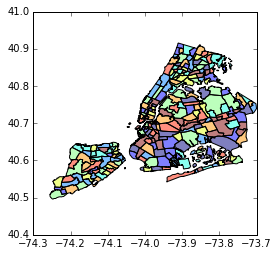

In [43]:
neighborhoods.plot()

In [44]:
neighborhoods_proj = neighborhoods.to_crs({'init': u'epsg:2263'})

In [88]:
neighborhoods_proj['npg'] = neighborhoods_proj.geometry
park_proj['ppg'] = park_proj.geometry

In [90]:
neighborhood_park_sj_overlap = gpd.sjoin(neighborhoods_proj, park_proj, how="inner", op='intersects')

In [91]:
neighborhood_park_overlap = gpd.overlay(neighborhoods_proj, park_proj,  how='intersection')

In [92]:
neighborhood_park_overlap.head()

,@id,borough,boroughCode,neighborhood,area,npg,acres,address,borough_2,communityb,...,location,nys_assemb,nys_senate,signname,typecatego,us_congres,waterfront,zipcode,ppg,geometry
0,http://nyc.pediacities.com/Resource/Neighborho...,Staten Island,5,Tottenville,6.422546e+07,"POLYGON ((918882.9111533738 129148.4429799406,...",286.382,298 SATERLEE STREET,R,503,...,"Pittsville St., Hylan Blvd. Richard Ave.",62,24,Conference House Park,Nature Area,11,Yes,"10307, 10309",(POLYGON ((914157.4433230602 122605.7823975023...,"POLYGON ((921501.0703680527 124393.9225219944,..."
1,http://nyc.pediacities.com/Resource/Neighborho...,Staten Island,5,Tottenville,6.422546e+07,"POLYGON ((918882.9111533738 129148.4429799406,...",286.382,298 SATERLEE STREET,R,503,...,"Pittsville St., Hylan Blvd. Richard Ave.",62,24,Conference House Park,Nature Area,11,Yes,"10307, 10309",(POLYGON ((914157.4433230602 122605.7823975023...,"POLYGON ((914157.4433230602 122605.7823975023,..."
2,http://nyc.pediacities.com/Resource/Neighborho...,Staten Island,5,Tottenville,6.422546e+07,"POLYGON ((918882.9111533738 129148.4429799406,...",9.763,None,R,503,...,Joline Ave. bet. Hylan Blvd. to Surf Ave.,62,24,Hybrid Oak Woods Park,Nature Area,11,No,10307,(POLYGON ((918773.7513476303 122433.8851034975...,"POLYGON ((919427.5548300607 122369.2208627507,..."
3,http://nyc.pediacities.com/Resource/Neighborho...,Staten Island,5,Tottenville,6.422546e+07,"POLYGON ((918882.9111533738 129148.4429799406,...",9.763,None,R,503,...,Joline Ave. bet. Hylan Blvd. to Surf Ave.,62,24,Hybrid Oak Woods Park,Nature Area,11,No,10307,(POLYGON ((918773.7513476303 122433.8851034975...,"POLYGON ((918773.7513476303 122433.8851034975,..."
4,http://nyc.pediacities.com/Resource/Neighborho...,Staten Island,5,Tottenville,6.422546e+07,"POLYGON ((918882.9111533738 129148.4429799406,...",286.382,298 SATERLEE STREET,R,503,...,"Pittsville St., Hylan Blvd. Richard Ave.",62,24,Conference House Park,Nature Area,11,Yes,"10307, 10309",(POLYGON ((914157.4433230602 122605.7823975023...,"POLYGON ((921493.2616566425 123478.3823583294,..."


In [48]:
park_proj.columns

Index([     u'acres',    u'address',    u'borough', u'communityb',
       u'councildis',   u'geometry', u'gispropnum',   u'location',
       u'nys_assemb', u'nys_senate',   u'signname', u'typecatego',
       u'us_congres', u'waterfront',    u'zipcode'],
      dtype='object')

In [63]:
neighborhood_park_overlap.columns

Index([         u'@id',      u'borough',  u'boroughCode', u'neighborhood',
               u'area',        u'acres',      u'address',    u'borough_2',
         u'communityb',   u'councildis',   u'gispropnum',     u'location',
         u'nys_assemb',   u'nys_senate',     u'signname',   u'typecatego',
         u'us_congres',   u'waterfront',      u'zipcode',     u'geometry'],
      dtype='object')

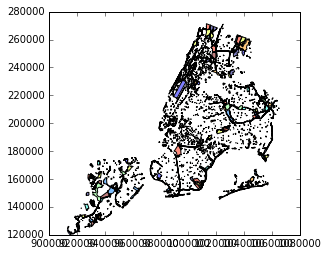

In [64]:
neighborhood_park_overlap.plot()

### Overlap plot

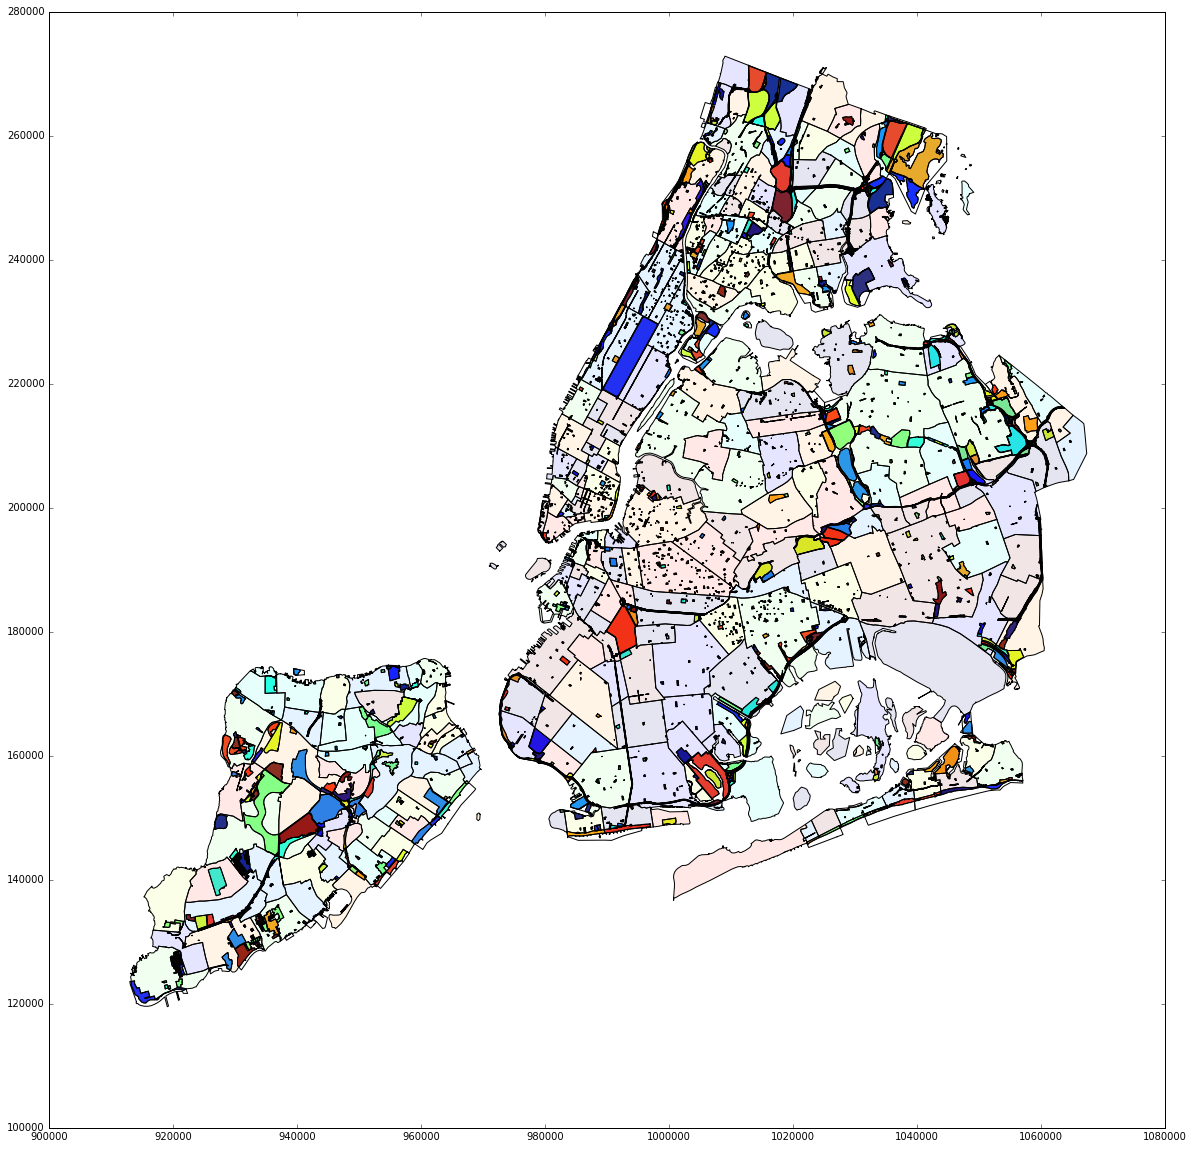

In [133]:
fig, ax = plt.subplots(figsize=(20, 20))
neighborhood_park_overlap.plot(ax=ax, alpha=0.9)
neighborhoods_proj.plot(ax=ax, alpha=0.1);
park_proj.plot(ax=ax, facecolor='none');

In [94]:
neighborhood_park_overlap['park_area'] = neighborhood_park_overlap['geometry'].area

In [95]:
neighborhood_park_overlap['neighborhood_area'] = neighborhood_park_overlap['npg'].area

AttributeError: 'Series' object has no attribute 'area'

In [83]:
neighborhood_park_overlap.park_area = neighborhood_park_overlap.park_area.apply(lambda x: float(x))

In [86]:
neighborhood_park_overlap.area = neighborhood_park_overlap.area.apply(lambda x: float(x))

In [98]:
neighborhood_park_overlap['percentage_park'] = neighborhood_park_overlap.park_area / neighborhood_park_overlap.area

In [103]:
neighborhood_park_overlap.columns

Index([            u'@id',         u'borough',     u'boroughCode',
          u'neighborhood',            u'area',             u'npg',
                 u'acres',         u'address',       u'borough_2',
            u'communityb',      u'councildis',      u'gispropnum',
              u'location',      u'nys_assemb',      u'nys_senate',
              u'signname',      u'typecatego',      u'us_congres',
            u'waterfront',         u'zipcode',             u'ppg',
              u'geometry',       u'park_area', u'percentage_park'],
      dtype='object')

In [108]:
test =neighborhood_park_overlap[['area','zipcode','park_area']].iloc[0]
test['park_area'] / test['area'] 

0.00128597165492818

In [116]:
park_areas = neighborhood_park_overlap.park_area
areas = neighborhood_park_overlap.area

In [184]:
grp_neighborhood_overlap = neighborhood_park_overlap.groupby('neighborhood').sum()

In [188]:
grp_neighborhood_overlap['percent_park_2'] = grp_neighborhood_overlap['park_area'] / grp_neighborhood_overlap['area'] * 100


In [190]:
grp_neighborhood_overlap[['park_area','area','percent_park_2']].sort_values(by='percent_park_2',ascending=False)

,park_area,area,percent_park_2
neighborhood,,,
South Brother Island,2.388882e+05,2.388882e+05,100.000000
Arlington,7.724086e+05,7.734331e+05,99.867537
North Brother Island,6.725342e+05,6.860878e+05,98.024514
Pelham Islands,1.985904e+05,2.648845e+05,74.972457
Central Park,3.653497e+07,7.684842e+07,47.541603
Silver Lake,8.971714e+06,3.469841e+07,25.856268
Ferry Point Park,1.388866e+07,5.971965e+07,23.256426
Marine Park,2.634851e+07,1.616147e+08,16.303291
Crotona Park,5.331702e+06,3.686225e+07,14.463853


(0, 5)

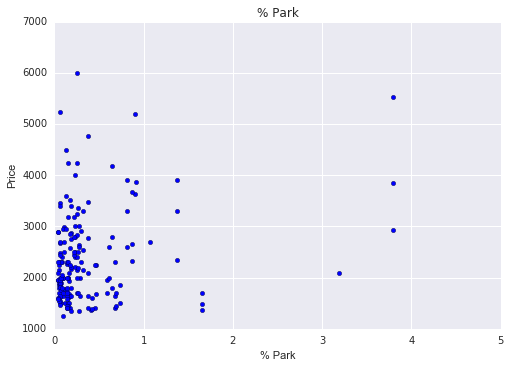

In [224]:
import seaborn as sns
x = zillow_neighborhoods_grp['percent_park']
y = zillow_neighborhoods_grp['_2017_01']
ax = plt.scatter(x,y)
plt.title('% Park')
plt.ylabel('Price')
plt.xlabel('% Park')



# ax = plt.scatter(x,y)
plt.xlim([0,5])

(0, 5000)

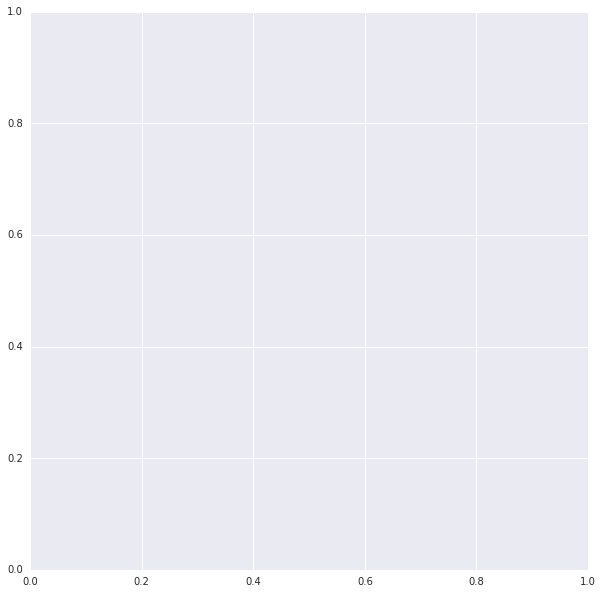

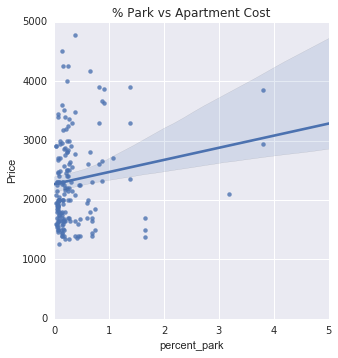

In [244]:


x = zillow_neighborhoods_grp['percent_park'][zillow_neighborhoods_grp['percent_park'] < 20]
y = zillow_neighborhoods_grp['_2017_01'][zillow_neighborhoods_grp['percent_park'] < 20]
plt.subplots(figsize=(10, 10))
sns.lmplot(x='percent_park',y='_2017_01', data=zillow_neighborhoods_grp[zillow_neighborhoods_grp['percent_park'] < 20])
plt.xlim([0,5])
plt.title('% Park vs Apartment Cost')
plt.ylabel('Price')

plt.ylim([0,5000])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

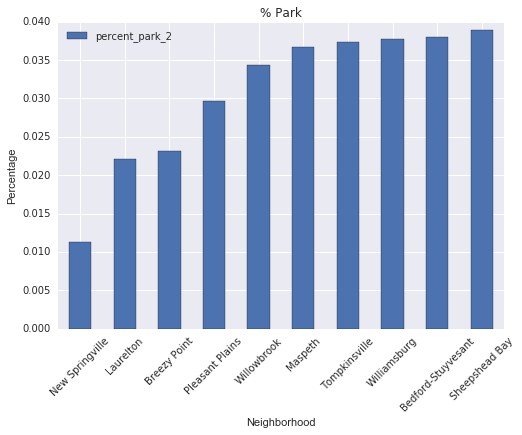

In [218]:
import seaborn as sns
ax = pd.DataFrame(grp_neighborhood_overlap['percent_park_2']) \
    .sort_values('percent_park_2').head(10).plot(kind='bar')
ax.set_title('% Park')
ax.set_ylabel('Percentage')
ax.set_xlabel('Neighborhood')
plt.xticks(rotation=45)

In [121]:
neighborhood_park_overlap['percent_park'] =neighborhood_park_overlap['park_area']/ neighborhood_park_overlap['area'] * 100
neighborhood_park_overlap.sort_values(by='percent_park', ascending=False).percent

,@id,borough,boroughCode,neighborhood,area,npg,acres,address,borough_2,communityb,...,signname,typecatego,us_congres,waterfront,zipcode,ppg,geometry,park_area,percentage_park,percent_park
3909,http://nyc.pediacities.com/Resource/Neighborho...,Bronx,2,South Brother Island,2.388882e+05,"POLYGON ((1012821.805786116 229228.2645873486,...",21.10936646,None,Q,202,...,South Brother Island,Nature Area,15,Yes,10021,"(POLYGON ((1013299.99963072 229436.000167095, ...","POLYGON ((1012821.805786116 229228.2645873486,...",2.388882e+05,1.0,1.000000e+02
3116,http://nyc.pediacities.com/Resource/Neighborho...,Bronx,2,Pelham Bay Park,1.071727e+04,"POLYGON ((1043299.709594703 257483.3843993716,...",2771.747,None,X,"210, 212",...,Pelham Bay Park,Flagship Park,None,Yes,"10461, 10464, 10464, 10465, 10469, 10475, 10803","(POLYGON ((1035312.05600022 262851.032418263, ...","POLYGON ((1043299.709594703 257483.3843993716,...",1.071727e+04,1.0,1.000000e+02
3595,http://nyc.pediacities.com/Resource/Neighborho...,Bronx,2,Pelham Islands,1.803709e+04,"POLYGON ((1044305.944396949 253549.9550170473,...",2771.747,None,X,"210, 212",...,Pelham Bay Park,Flagship Park,None,Yes,"10461, 10464, 10464, 10465, 10469, 10475, 10803","(POLYGON ((1035312.05600022 262851.032418263, ...","POLYGON ((1044305.944396949 253549.9550170473,...",1.803709e+04,1.0,1.000000e+02
3152,http://nyc.pediacities.com/Resource/Neighborho...,Bronx,2,Pelham Islands,1.052439e+05,"POLYGON ((1043476.402038549 260233.0737914967,...",2771.747,None,X,"210, 212",...,Pelham Bay Park,Flagship Park,None,Yes,"10461, 10464, 10464, 10465, 10469, 10475, 10803","(POLYGON ((1035312.05600022 262851.032418263, ...","POLYGON ((1043476.402038549 260233.0737914967,...",1.052439e+05,1.0,1.000000e+02
3109,http://nyc.pediacities.com/Resource/Neighborho...,Bronx,2,Pelham Islands,9.052281e+03,"POLYGON ((1044422.922607396 258110.6337890356,...",2771.747,None,X,"210, 212",...,Pelham Bay Park,Flagship Park,None,Yes,"10461, 10464, 10464, 10465, 10469, 10475, 10803","(POLYGON ((1035312.05600022 262851.032418263, ...","POLYGON ((1044422.922607396 258110.6337890356,...",9.052281e+03,1.0,1.000000e+02
3133,http://nyc.pediacities.com/Resource/Neighborho...,Bronx,2,Pelham Bay Park,4.888228e+03,"POLYGON ((1043418.439636209 257692.5838012224,...",2771.747,None,X,"210, 212",...,Pelham Bay Park,Flagship Park,None,Yes,"10461, 10464, 10464, 10465, 10469, 10475, 10803","(POLYGON ((1035312.05600022 262851.032418263, ...","POLYGON ((1043418.439636209 257692.5838012224,...",4.888228e+03,1.0,1.000000e+02
842,http://nyc.pediacities.com/Resource/Neighborho...,Brooklyn,3,Marine Park,3.583926e+06,"POLYGON ((1006699.530029269 157740.5903930993,...",798,None,B,"315, 318",...,Marine Park,Community Park,"9, 8",Yes,"11229, 11234, 11235",(POLYGON ((1004097.446513548 152119.8290123343...,"POLYGON ((1006699.530029269 157740.5903930993,...",3.583926e+06,1.0,1.000000e+02
2216,http://nyc.pediacities.com/Resource/Neighborho...,Staten Island,5,Arlington,7.734331e+05,"POLYGON ((939915.9992065338 173002.1387938878,...",34.689,None,R,501,...,Shooters Island,Nature Area,11,Yes,10303,(POLYGON ((941202.9528802185 173081.1919451694...,"POLYGON ((939451.6308187257 173967.8863841798,...",7.724086e+05,1.0,9.986754e+01
3935,http://nyc.pediacities.com/Resource/Neighborho...,Bronx,2,North Brother Island,6.860878e+05,"POLYGON ((1012397.728393535 231633.9750366646,...",30.395,None,X,202,...,North Brother Island,Nature Area,15,Yes,10474,(POLYGON ((1012898.825892389 230776.1513581872...,"POLYGON ((1012397.728393535 231633.9750366646,...",6.725342e+05,1.0,9.802451e+01
736,http://nyc.pediacities.com/Resource/Neighborho...,Brooklyn,3,Marine Park,2.050991e+07,"POLYGON ((1006023.373278799 160665.4103673883,...",798,None,B,"315, 318",...,Marine Park,Community Park,"9, 8",Yes,"11229, 11234, 11235",(POLYGON ((1004097.446513548 152119.8290123343...,"POLYGON ((1008982.975808358 153126.6716921865,...",1.954457e+07,1.0,9.529331e+01


In [128]:
neighborhood_park_overlap.percent_park.iloc[0]

0.12859716549281799

In [183]:
neighborhood_park_overlap[['percent_park','neighborhood']]

,percent_park,neighborhood
0,1.285972e-01,Tottenville
1,8.666701e+00,Tottenville
2,2.750232e-01,Tottenville
3,3.871712e-01,Tottenville
4,1.485904e+00,Tottenville
5,2.210715e-01,Tottenville
6,2.729217e-02,Tottenville
7,1.120849e-01,Tottenville
8,7.306172e-02,Tottenville
9,1.317043e-02,Tottenville


(0, 20)

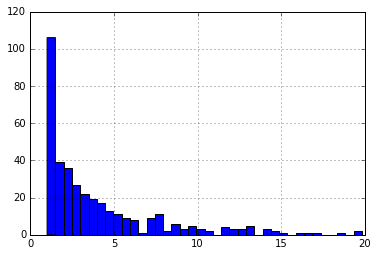

In [197]:
ax = neighborhood_park_overlap[neighborhood_park_overlap.percent_park > 1].sort_values(by='percent_park', ascending=False).percent_park.hist(bins=200)
ax.set_xlim([0,20])


In [118]:
park_areas / areas

TypeError: cannot convert the series to <type 'float'>

## Area overlaps of zipcodes and Parks

In [19]:
# !pip install rtree

  Using cached Rtree-0.8.3-py2-none-any.whl


In [22]:
# !pip install libspatialindex

  Could not find a version that satisfies the requirement libspatialindex (from versions: )
No matching distribution found for libspatialindex


In [13]:
# http://jspeis.com/installing-rtree-on-mac-os-x/
import rtree

In [39]:
c[['ZIPCODE', 'zipcode']]

,ZIPCODE,zipcode
28,10464,10464
31,10460,10460


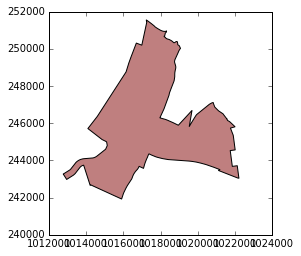

In [42]:
c[c.zipcode == '10460'].plot()

In [15]:
c = gpd.sjoin(zipcodes_proj, park_proj, how="inner", op='intersects')

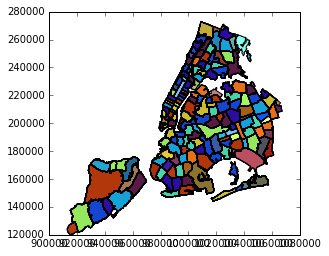

In [16]:
c.plot()

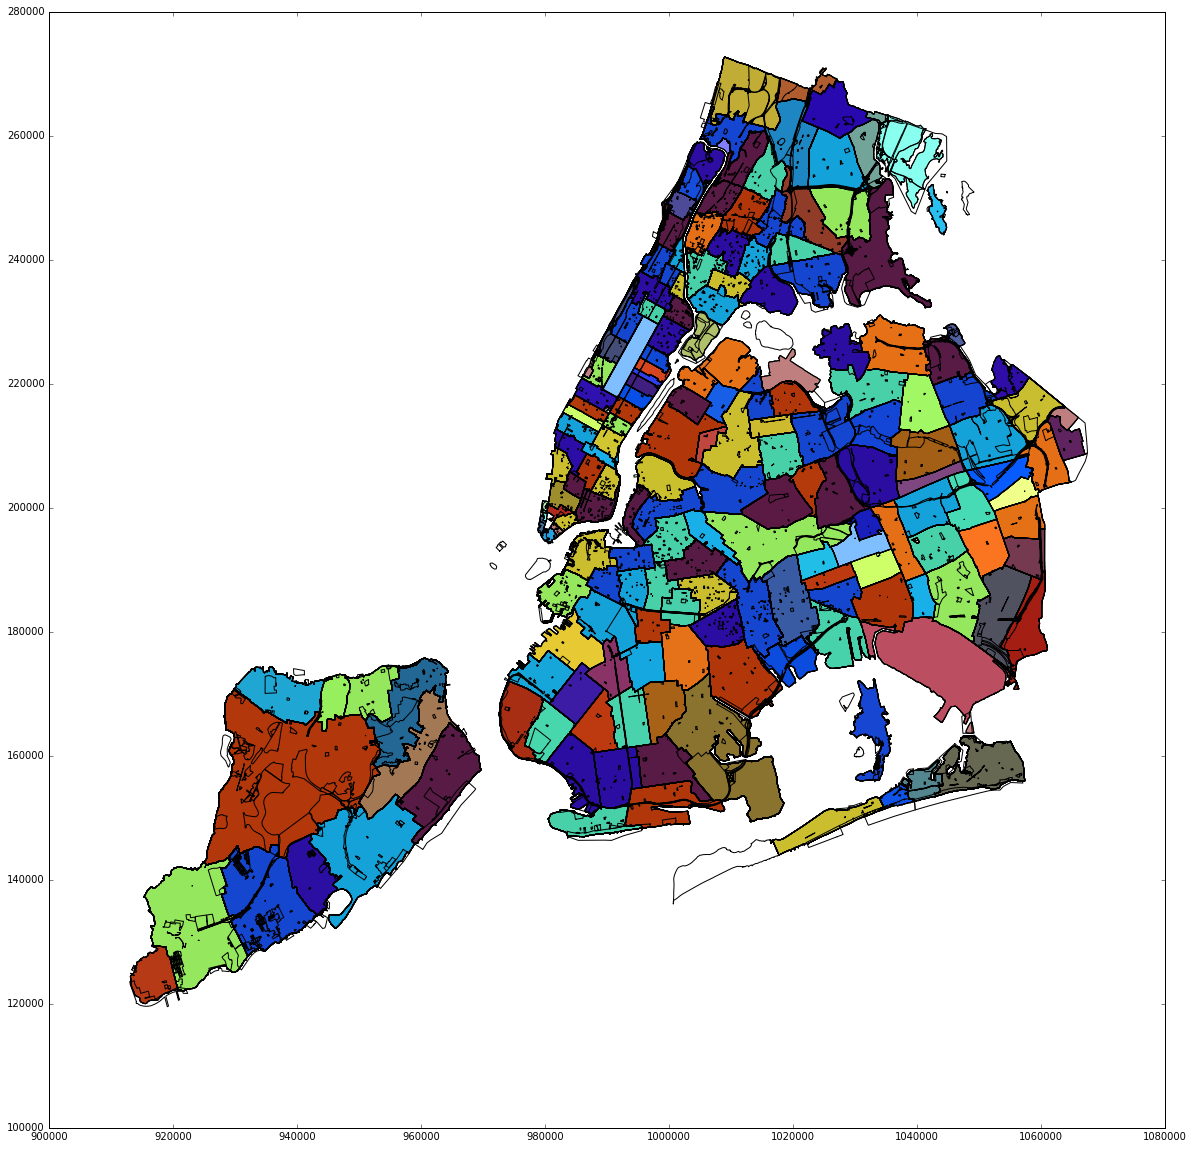

In [17]:
fig, ax = plt.subplots(figsize=(20, 20))
c.plot(ax=ax)
zipcodes_proj.plot(ax=ax, facecolor='none');
park_proj.plot(ax=ax, facecolor='none');

In [48]:
zipcodes_proj.shape

(263, 13)

In [49]:
park_proj.shape

(2008, 15)

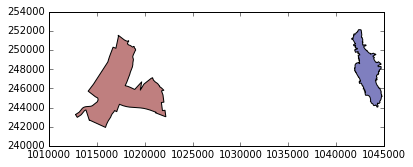

In [28]:
c.plot()

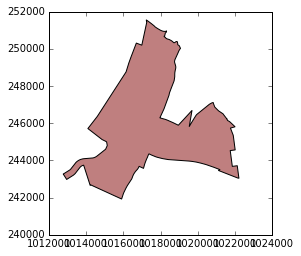

In [32]:
zipcodes_proj[zipcodes_proj.ZIPCODE == '10460'].plot()

In [ ]:
# res_intersection = gpd.overlay(zipcodes, park_proj, how='intersection')

In [58]:
res_intersection

,AREA,BLDGZIP,COUNTY,CTY_FIPS,POPULATION,PO_NAME,SHAPE_AREA,SHAPE_LEN,STATE,ST_FIPS,...,gispropnum,location,nys_assemb,nys_senate,signname,typecatego,us_congres,waterfront,zipcode,geometry
0,1.158795e+07,0,Bronx,005,4438.0,Bronx,0.0,0.0,NY,36,...,X253,City Island Ave bet. Centre St. and Winter St.,82,34,Ambrosini Field,Recreation Field/Courts,14,Yes,10464,"POLYGON ((1044163.58699038 246766.6133906163, ..."
1,3.515567e+07,0,Bronx,005,56670.0,Bronx,0.0,0.0,NY,36,...,X245,E 180 St bet. the Bronx River and Devoe Av,87,33,River Garden,Garden,15,Yes,10460,"POLYGON ((1018493.260897728 246060.4564194266,..."


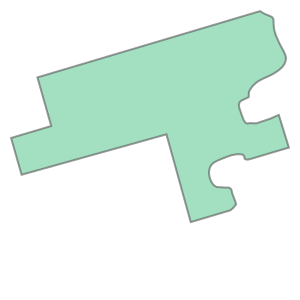

In [42]:
res_intersection.iloc[0].geometry

In [57]:
zipcodes_proj[zipcodes_proj.ZIPCODE =='10464']#.iloc[2].geometry

,AREA,BLDGZIP,COUNTY,CTY_FIPS,POPULATION,PO_NAME,SHAPE_AREA,SHAPE_LEN,STATE,ST_FIPS,URL,ZIPCODE,geometry
16,7.625748e+07,0,Bronx,005,4438.0,Bronx,0.0,0.0,NY,36,http://www.usps.com/,10464,"POLYGON ((1035294.156757892 263362.0300961387,..."
27,4.512531e+06,0,Bronx,005,4438.0,Bronx,0.0,0.0,NY,36,http://www.usps.com/,10464,"POLYGON ((1047319.759675147 251630.1185206389,..."
28,1.158795e+07,0,Bronx,005,4438.0,Bronx,0.0,0.0,NY,36,http://www.usps.com/,10464,"POLYGON ((1041692.690220641 251236.5385991323,..."


In [40]:
res_intersection.head()

,AREA,BLDGZIP,COUNTY,CTY_FIPS,POPULATION,PO_NAME,SHAPE_AREA,SHAPE_LEN,STATE,ST_FIPS,...,gispropnum,location,nys_assemb,nys_senate,signname,typecatego,us_congres,waterfront,zipcode,geometry
0,1.158795e+07,0,Bronx,005,4438.0,Bronx,0.0,0.0,NY,36,...,X253,City Island Ave bet. Centre St. and Winter St.,82,34,Ambrosini Field,Recreation Field/Courts,14,Yes,10464,"POLYGON ((1044163.58699038 246766.6133906163, ..."
1,3.515567e+07,0,Bronx,005,56670.0,Bronx,0.0,0.0,NY,36,...,X245,E 180 St bet. the Bronx River and Devoe Av,87,33,River Garden,Garden,15,Yes,10460,"POLYGON ((1018493.260897728 246060.4564194266,..."


In [32]:
gpd.__version__

u'0.2.1'

In [37]:
zipcodes_proj.columns

Index([      u'AREA',    u'BLDGZIP',     u'COUNTY',   u'CTY_FIPS',
       u'POPULATION',    u'PO_NAME', u'SHAPE_AREA',  u'SHAPE_LEN',
            u'STATE',    u'ST_FIPS',        u'URL',    u'ZIPCODE',
         u'geometry'],
      dtype='object')

In [38]:
park_proj.columns

Index([     u'acres',    u'address',    u'borough', u'communityb',
       u'councildis',   u'geometry', u'gispropnum',   u'location',
       u'nys_assemb', u'nys_senate',   u'signname', u'typecatego',
       u'us_congres', u'waterfront',    u'zipcode'],
      dtype='object')

In [35]:
res_intersection.columns

Index([      u'AREA',    u'BLDGZIP',     u'COUNTY',   u'CTY_FIPS',
       u'POPULATION',    u'PO_NAME', u'SHAPE_AREA',  u'SHAPE_LEN',
            u'STATE',    u'ST_FIPS',        u'URL',    u'ZIPCODE',
            u'acres',    u'address',    u'borough', u'communityb',
       u'councildis', u'gispropnum',   u'location', u'nys_assemb',
       u'nys_senate',   u'signname', u'typecatego', u'us_congres',
       u'waterfront',    u'zipcode',   u'geometry'],
      dtype='object')

# area overlap with communities

In [25]:
communities_parks_overlap = gpd.sjoin(communities_proj, park_proj, how="inner", op='intersects')

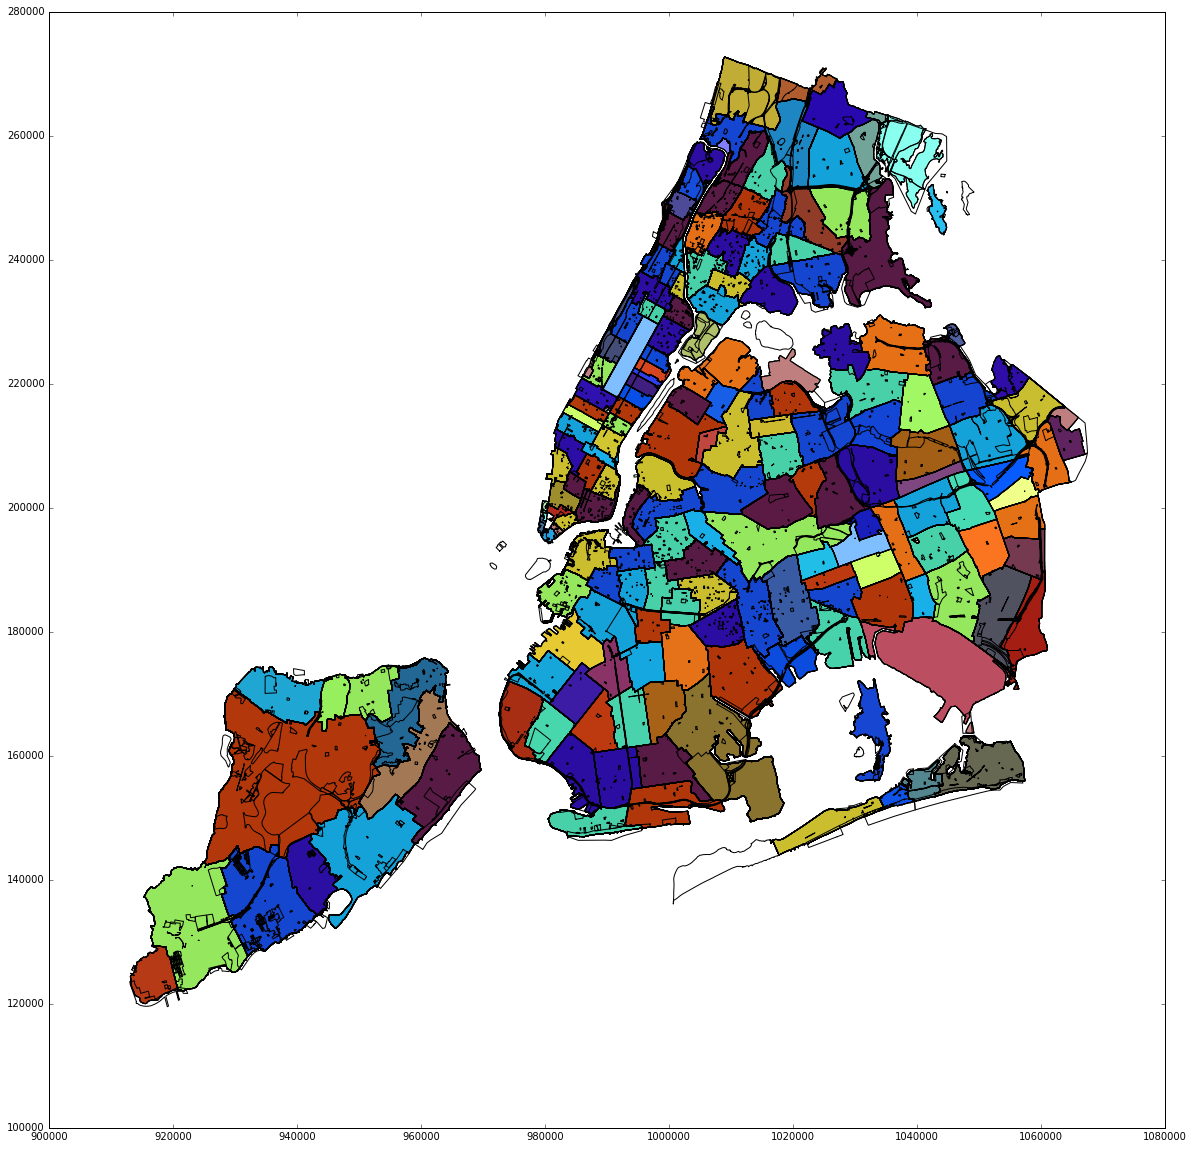

In [26]:
fig, ax = plt.subplots(figsize=(20, 20))
c.plot(ax=ax)
zipcodes_proj.plot(ax=ax, facecolor='none');
park_proj.plot(ax=ax, facecolor='none');

## Zillow Data

In [6]:
zipcodes_nyc = [
    '10001',    '10002',
    '10003',    '10004',    '10005',
    '10006',    '10007',    '10009',    '10010', '10011',
    '10012',
    '10013',
    '10014',  '10016',
    '10017',
    '10018',
    '10019',
    '10020',
    '10021',
    '10022',
    '10023',
    '10024',
    '10025',
    '10026',   '10027',
    '10028',    '10029',
    '10030',    '10031',
    '10032',    '10033',
    '10034',    '10035',
    '10036',    '10037',
    '10038',    '10039',
    '10040',
    '10044',
    '10048',
    '10065',
    '10069',
    '10075',
    '10111',
    '10115',
    '10128',
    '10280',
    '10281',
    '10282',
    '10301',
    '10302',
    '10303',
    '10304',
    '10305',
    '10306',
    '10307',
    '10308',
    '10309',
    '10310',
    '10312',
    '10314',
    '10451',
    '10452',
    '10453',
    '10454',
    '10455',
    '10456',
    '10457',
    '10458',
    '10459',
    '10460',
    '10461',
    '10462',
    '10465',
    '10466',
    '10467',
    '10468',
    '10469',
    '10470',
    '10471',
    '10472',
    '10473',
    '10474',
    '10475',
    '11001',
    '11004',
    '11005',
    '11040',
    '11096',
    '11101',
    '11102',
    '11103',
    '11104',
    '11105',
    '11106',
    '11109',
    '11201',
    '11203',
    '11204',
    '11205',
    '11206',
    '11207',
    '11208',
    '11209',
    '11210',
    '11211',
    '11212',
    '11213',
    '11214',
    '11215',
    '11216',
    '11217',
    '11218',
    '11219',
    '11220',
    '11221',
    '11222',
    '11223',
    '11224',
    '11225',
    '11226',
    '11228',
    '11229',
    '11230',
    '11231',
    '11232',
    '11233',
    '11234',
    '11235',
    '11236',
    '11237',
    '11238',
    '11239',
    '11251',
    '11354',
    '11355',
    '11356',
    '11357',
    '11358',
    '11359',
    '11360',
    '11361',
    '11362',
    '11363',
    '11364',
    '11365',
    '11366',
    '11367',
    '11368',
    '11369',
    '11371',
    '11372',
    '11373',
    '11374',
    '11375',
    '11377',
    '11378',
    '11379',
    '11385',
    '11411',
    '11412',
    '11413',
    '11414',
    '11415',
    '11416',
    '11417',
    '11418',
    '11419',
    '11420',
    '11421',
    '11422',
    '11423',
    '11426',
    '11427',
    '11428',
    '11429',
    '11430',
    '11432',
    '11433',
    '11434',
    '11435',
    '11436',
    '11451',
    '11691',
    '11692',
    '11694',
    '11697',
]
zipcodes_nyc = [int(x) for x in zipcodes_nyc]

In [27]:
from pandas.io.gbq import read_gbq  
project = "spheric-crow-161317" 
sample_query = "SELECT * FROM `smart_cities_data.median_rents_neighborhood_studio`"  
studio_zip = read_gbq(query=sample_query, project_id=project, dialect='standard')
studio_zip['kind'] = 'studio'

/Users/ingridspielman/.virtualenvs/test/lib/python2.7/site-packages/oauth2client/_helpers.py:255: UserWarning: Cannot access bigquery_credentials.dat: No such file or directory
  warnings.warn(_MISSING_FILE_MESSAGE.format(filename))



Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/v2/auth?scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&response_type=code&client_id=495642085510-k0tmvj2m941jhre2nbqka17vqpjfddtd.apps.googleusercontent.com&access_type=offline

If your browser is on a different machine then exit and re-run this
application with the command-line parameter

  --noauth_local_webserver

Authentication successful.
Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 81 rows.

Total time taken 1.16 s.
Finished at 2017-03-25 16:21:03.


In [28]:
sample_query = "SELECT * FROM `smart_cities_data.median_rents_neighborhood_1br`"  
br1_zip = read_gbq(query=sample_query, project_id=project, dialect='standard')
br1_zip['kind'] = 'br1'

Requesting query... ok.
Query running...
Query done.
Processed: 136.0 kb

Retrieving results...
Got 274 rows.

Total time taken 2.47 s.
Finished at 2017-03-25 16:21:09.


In [29]:
sample_query = "SELECT * FROM `smart_cities_data.median_rents_neighborhood_2br`"  
br2_zip = read_gbq(query=sample_query, project_id=project, dialect='standard')
br2_zip['kind'] = 'br2'
br2_zip.shape

Requesting query... ok.
Query running...
Query done.
Processed: 141.7 kb

Retrieving results...
Got 292 rows.

Total time taken 3.12 s.
Finished at 2017-03-25 16:21:15.


(292, 84)

In [ ]:
pediacitiesnycneighborhoods.geojson

In [30]:
br2_neighborhood = br2_zip[[u'RegionName', u'City', u'State', u'Metro', u'CountyName', u'SizeRank',
         u'_2016_01', u'_2016_02', u'_2016_03', u'_2016_04',
       u'_2016_05', u'_2016_06', u'_2016_07', u'_2016_08', u'_2016_09',
       u'_2016_10', u'_2016_11', u'_2016_12', u'_2017_01', u'kind']]

In [31]:
br1_neighborhood = br1_zip[[u'RegionName', u'City', u'State', u'Metro', u'CountyName', u'SizeRank',
         u'_2016_01', u'_2016_02', u'_2016_03', u'_2016_04',
       u'_2016_05', u'_2016_06', u'_2016_07', u'_2016_08', u'_2016_09',
       u'_2016_10', u'_2016_11', u'_2016_12', u'_2017_01', u'kind']]

In [32]:
studio_neighborhood = studio_zip[[u'RegionName', u'City', u'State', u'Metro', u'CountyName', u'SizeRank',
         u'_2016_01', u'_2016_02', u'_2016_03', u'_2016_04',
       u'_2016_05', u'_2016_06', u'_2016_07', u'_2016_08', u'_2016_09',
       u'_2016_10', u'_2016_11', u'_2016_12', u'_2017_01', u'kind']]

In [33]:
apt_types = pd.concat([br2_zip, br1_zip, studio_zip])

In [148]:
zillow_neighborhoods = neighborhood_park_overlap.merge(apt_types, right_on='RegionName', left_on='neighborhood')

In [192]:
grp_neighborhood_overlap_unstacked = grp_neighborhood_overlap.reset_index()

In [193]:
zillow_neighborhoods_grp = grp_neighborhood_overlap_unstacked.merge(apt_types, right_on='RegionName', left_on='neighborhood')

In [194]:
zillow_neighborhoods_grp[['percent_park', u'_2017_01']].corr()

,percent_park,_2017_01
percent_park,1.000000,0.263228
_2017_01,0.263228,1.000000


(0, 5)

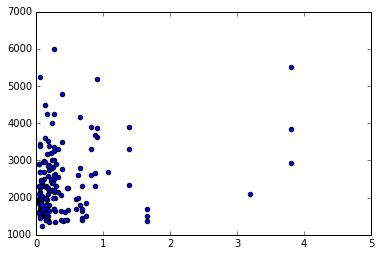

In [195]:
x = zillow_neighborhoods_grp['percent_park']
y = zillow_neighborhoods_grp['_2017_01']
ax = plt.scatter(x,y)
plt.xlim([0,5])

In [ ]:
zillow_neighborhoods_grp

In [151]:
szn = zillow_neighborhoods[['percent_park','neighborhood', u'SizeRank',
         u'_2016_01', u'_2016_02', u'_2016_03', u'_2016_04',
       u'_2016_05', u'_2016_06', u'_2016_07', u'_2016_08', u'_2016_09',
       u'_2016_10', u'_2016_11', u'_2016_12', u'_2017_01', u'kind']]

In [160]:
zillow_neighborhoods[['percent_park', u'_2017_01']].corr()

,percent_park,_2017_01
percent_park,1.000000,0.062392
_2017_01,0.062392,1.000000


In [174]:
ds = zillow_neighborhoods[['percent_park',u'_2017_01','neighborhood']].groupby('neighborhood').mean().sort_values('percent_park', ascending=False)

In [181]:
ds.head(10)

,percent_park,_2017_01
neighborhood,,
Central Park,47.541603,3873.750000
South Beach,14.032946,4691.250000
Flatiron District,3.796692,4100.166667
Dyker Heights,3.184190,2100.000000
Concourse,1.653438,1535.000000
Inwood,1.649169,1492.000000
Gramercy,1.377781,3181.666667
Morningside Heights,1.071682,2700.000000
NoHo,0.910067,3872.500000


In [176]:
ds.corr()

,percent_park,_2017_01
percent_park,1.000000,0.329954
_2017_01,0.329954,1.000000


(0, 5)

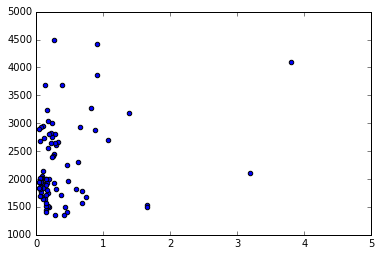

In [180]:
x = ds['percent_park']
y = ds['_2017_01']
ax = plt.scatter(x,y)
plt.xlim([0,5])

In [146]:
neighborhood_park_overlap.neighborhood.value_counts()

Harlem                                   136
East New York                            102
Upper West Side                          100
Crown Heights                             97
Bedford-Stuyvesant                        84
Sheepshead Bay                            70
Williamsburg                              70
Washington Heights                        67
East Harlem                               64
Brownsville                               62
Bayside                                   61
Upper East Side                           57
Alley Pond Park                           54
Douglaston                                54
Flushing                                  52
Pelham Bay Park                           51
Gravesend                                 51
Bellerose                                 51
East Village                              46
Longwood                                  46
Arden Heights                             45
East Elmhurst                             45
Tottenvill

In [40]:
apt_types[apt_types.Metro == 'New York'].RegionName.value_counts()

Downtown                     6
Murray Hill                  4
Sunnyside                    3
Clinton Hill                 3
Columbus Circle              3
Crown Heights                3
Forest Hills                 3
Greenwich Village            3
Tribeca                      3
Midtown                      3
Flatiron District            3
Elmhurst                     3
Hunters Point                3
Upper West Side              3
Harlem                       3
Lower East Side              3
East Village                 3
Battery Park                 3
Upper East Side              3
Fort Greene                  3
Tudor City                   3
Brooklyn Heights             3
Fort Hamilton                3
West Village                 3
East Harlem                  3
Rego Park                    3
Sutton Place                 3
Clinton                      3
Washington Heights           3
Gramercy                     3
                            ..
Little Italy                 2
Central 

In [34]:
nyc_apts = apt_types[apt_types.RegionName.isin(zipcodes_nyc)]

NameError: name 'zipcodes_nyc' is not defined

In [18]:
nyc_apts.kind.value_counts()

br1       102
br2        95
studio     49
Name: kind, dtype: int64

In [41]:
nyc_apts.to_csv('merged_data.csv')